# Исследование надежности заемщиков


Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [5]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [6]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [7]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [8]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [9]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [10]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [11]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [12]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [13]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру. Проверьте остальные столбцы.**

In [14]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [15]:
data.duplicated().sum()

71

In [16]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [17]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [18]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [19]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [20]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [21]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [22]:
def categorize_children(children): # поскольку в выборке мало данных по клиентам с большим количеством детей,
    if children == 0:          # я объединила всех клиентов с >= 3 детьми в категорию "многодетные"
        return 'бездетный'
    elif children == 1:
        return '1 ребёнок'
    elif children == 2:
        return '2 детей'
    elif children >= 3:
        return 'многодетный'
    else:
        return 'нет категории'

In [49]:
data['children_category'] = data['children'].apply(categorize_children) # назначаем категории по количеству детей
debt_by_children = data.groupby('children_category')['debt'].sum() # группируем долги по этим категориям и подсчитываем их количество;
# sum - потому, что в записях 0 означает отсутствие долга и 1 - его наличие, т.е. sum подсчитает количество имеющих долги
debt_children_all = data.groupby('children_category')['debt'].count() # подсчитываем общее количество записей по каждой категории, чтобюы рассчитать долю
#print(debt_children_all) # оценка размера выборки по группам
print(debt_by_children / debt_children_all) # вспомогательный вывод
data_debt_children = debt_by_children / debt_children_all

children_category
1 ребёнок      0.092346
2 детей        0.094542
бездетный      0.075438
многодетный    0.081579
Name: debt, dtype: float64


**Вывод:** в данной выборке наименьший процент долгов у бездетных, наибольший - у клиентов с 1 и 2 детьми. Разница не превышает 2 процентных пункта.

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [24]:
data['family_status'].unique() # изучаем, какие в данных есть семейные положения

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [25]:
print(data.groupby('family_status')['family_status_id'].count()) # считаем семейные положения по status id

family_status
Не женат / не замужем     2796
в разводе                 1189
вдовец / вдова             951
гражданский брак          4134
женат / замужем          12261
Name: family_status_id, dtype: int64


In [26]:
debt_by_family_status = data.groupby('family_status')['debt'].sum() # как и в количестве детей, группируем долги по этим категориям и подсчитываем их количество;
# sum - потому, что в записях 0 означает отсутствие долга и 1 - его наличие, т.е. sum подсчитает количество имеющих долги
debt_family_all = data.groupby('family_status')['debt'].count() # подсчитываем общее количество записей по каждой категории, чтобюы рассчитать долю
# print(debt_by_family_status / debt_family_all)
data_debt_family = debt_by_family_status / debt_family_all

**Вывод:** самый низкий процент долгов у вдовцов. У женатых/замужних и разведённых долгов меньше, чем у неженатых и живущих в гражданском браке.

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [50]:
debt_by_income = data.groupby('total_income_category')['debt'].sum() # группируем долги по категориям дохода (категоризация уже реализована)
# sum - потому, что в записях 0 означает отсутствие долга и 1 - его наличие, т.е. sum подсчитает количество имеющих долги
debt_income_all = data.groupby('total_income_category')['debt'].count() # подсчитываем общее количество записей по каждой категории, чтобюы рассчитать долю
print(debt_income_all) # для оценки размера выборки
print(debt_by_income / debt_income_all)
data_debt_income = debt_by_income / debt_income_all

total_income_category
A       25
B     5014
C    15921
D      349
E       22
Name: debt, dtype: int64
total_income_category
A    0.080000
B    0.070602
C    0.084982
D    0.060172
E    0.090909
Name: debt, dtype: float64


**Вывод:** Малая выборка не позволяет объективно оценить зависимость для категорий А (доход более миллиона) и Е (до 30000). Самый низкий процент долгов у категории D (доход от 30001 до 50000), у категорий с более высоким доходом можно сделать вывод о том, что высокий доход (у категории В) означает меньший долг.

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [51]:
debt_by_purpose = data.groupby('purpose_category')['debt'].sum() # группируем долги по целям кредита (категоризация уже реализована)
# sum - потому, что в записях 0 означает отсутствие долга и 1 - его наличие, т.е. sum подсчитает количество имеющих долги
debt_purpose_all = data.groupby('purpose_category')['debt'].count() # подсчитываем общее количество записей по каждой категории, чтобюы рассчитать долю
print('Выборка', debt_purpose_all) # для оценки размера выборки
print('Результат', debt_by_purpose / debt_purpose_all)
data_debt_purpose = debt_by_purpose / debt_purpose_all

Выборка purpose_category
операции с автомобилем       4279
операции с недвижимостью    10751
получение образования        3988
проведение свадьбы           2313
Name: debt, dtype: int64
Результат purpose_category
операции с автомобилем      0.093480
операции с недвижимостью    0.072551
получение образования       0.092528
проведение свадьбы          0.079118
Name: debt, dtype: float64


**Вывод:** Меньше всего долгов у клиентов, берущих кредиты на недвижимость и проведение свадьбы (разница между ними незначительна). Наоборот, на операциях с автомобилем и образовании долгов по кредитам больше.

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ:* Число пропусков одинаково для столбцов `days_employed` и `total_income`, следовательно, они могут быть связаны. Скорее всего, эти люди никогда не работали официально и не имели зарегистрированного дохода, поэтому не могут предоставить такие данные о себе.

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ:* В уровнях дохода большой разброс, при этом клиентов с очень большим доходом мало (с доходом от миллиона - 25 человек во всём датасете), но они будут "тянуть на себя" среднее значение. Поэтому медианное значение с большей вероятностью "подойдёт" под пропуски в доходах. То же самое относится к дням работы.

### Шаг 4: общий вывод.

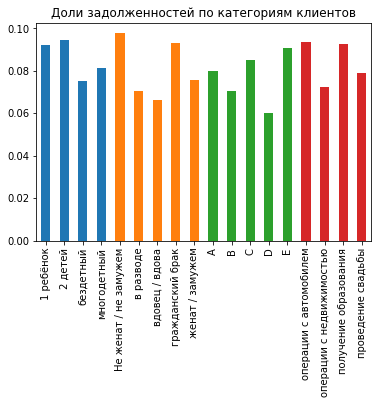

In [44]:
debts = [data_debt_children, data_debt_family, data_debt_income, data_debt_purpose]
# сводим все series в один список...
data_debts = pd.concat(debts, axis=1) # ...и превращаем его в датафрейм
# print(data_debts) # вспомогательный вывод
data_title = 'Доли задолженностей по категориям клиентов'
data_output = data_debts.plot.bar(stacked=True, title=data_title, legend=False)

~~Самые надёжные заёмщики - бездетные, состоящие в браке или разведённые/вдовцы, берущие кредит на недвижимость либо свадьбу. Прямой взаимосвязи долгов по кредитам с уровнем дохода не выявлено (и недостаточно данных для двух крайностей по доходам - менее 30000 и более 1000000). Самые ненадёжные - имеющие 1-2 детей, берущие кредит на образование либо операции с автомобилем.~~

<div style="background: #B0E0E6; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='4682B4'><u><b>НОВЫЙ ВЫВОД</b></u></font>
    <br />
    <b>В исследовании получены ответы на следующие вопросы:</b>
    <ol>
    <li>Влияет ли количество детей у клиента на наличие задолженности по кредиту?<br>
    <i>Ответ:</i> частично влияет. Минимальный процент долгов (7,5%) обнаружился у бездетных клиентов, в то время как заёмщики с двумя детьми показали самый высокий процент задолженности (9,5%). Многодетные заёмщики (имеющие 3 и более детей) показали сниженную долю задолженности по сравнению с теми, у кого 1-2 ребёнка, но из-за небольшого количества таких клиентов в наборе данных сделать уверенный прогноз по ним сложно.</li>
    <li>Влияет ли семейное положение на наличие задолженности по кредиту?<br>
    <i>Ответ:</i> влияет. Выделяются две чёткие группы клиентов: были/в настоящее время женаты официально (включая разведённых и вдовцов) и не были женаты официально, при этом у второй группы доля задолженностей заметно выше.</li>
    <li>Влияет ли доход на наличие задолженности по кредиту?<br>
    <i>Ответ:</i> частично влияет, но неочевидным образом. Самый малый процент задолженности (6%) оказался у клиентов с категорией дохода D - 30000-50000. Самый большой (9%) - у категории Е, но выборка клиентов с самым малым и самым большим доходом очень мала, что не позволяет сделать объективные выводы. При этом у категорий с доходом выше среднего (более 50000, но менее 1000000) тенденция к наличию задолженности не снижается, а скорее растёт.<br>
        <i>Вывод:</i> доход не является надёжным показателем заёмщика. Также рекомендуется дополнительное исследование на большем объёме данных, особенно по двум крайним категориям дохода.</li>
    <li>Как разные цели кредита влияют на наличие задолженности?<br>
    <i>Ответ:</i> минимальная доля задолженностей у клиентов, берущих кредит на жильё (7,3%) и проведение свадьбы (7,9%), при этом кредиты на операции с автомобилем и образование, наоборот, показывают увеличенное количество задолженностей - более 9%.</li>
        </ol>
        <b>Общий вывод:</b> в оценке платежеспособности клиентов можно использовать гипотезы 2 (о семейном положении) и 4 (о целях кредита). Необходимо исследование на большем наборе данных для оценки гипотез 1 (о количестве детей, особенно интересуют данные по многодетным) и 3 (о доходе, здесь необходимо больше данных о людях как с очень малым, так и с очень большим доходом).
</div>